In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import sys
import scipy as sp

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''
print(os.environ['CUDA_VISIBLE_DEVICES'])

In [3]:
sys.path.append('../models/cWGAN/Run_2021-01-17_3/')
import cWGAN

In [4]:
save_dir = '../models/cWGAN/Run_2021-01-17_3/'
assert(os.path.isdir(save_dir))

In [10]:
losses = []
with open(save_dir+'generator_losses.txt', 'r') as f:
    for _ in range(100000):
        line = f.readline()
        begin = int(line.find(')'))
        start = int(line.find('(', begin))
        end = int(line.find(',', begin+2))
        if start > 0:
            losses.append(float(line[start+1:end]))

In [6]:
critic_losses = []
with open(save_dir+'critic_losses.txt', 'r') as f:
    for _ in range(80000):
        line = f.readline()
       # print(line)
        start = int(line.find('('))
        end = int(line.find(','))
        if start > 0:
            critic_losses.append(-float(line[start+1:end]))

In [7]:
print(len(losses))
print(len(critic_losses))
print(len(losses)*5)
x = np.arange(0, len(losses))
x = x*50
#print(x)

9999
79999
49995


In [11]:
new_losses = sp.ndimage.median_filter(losses, size=20)

No handles with labels found to put in legend.


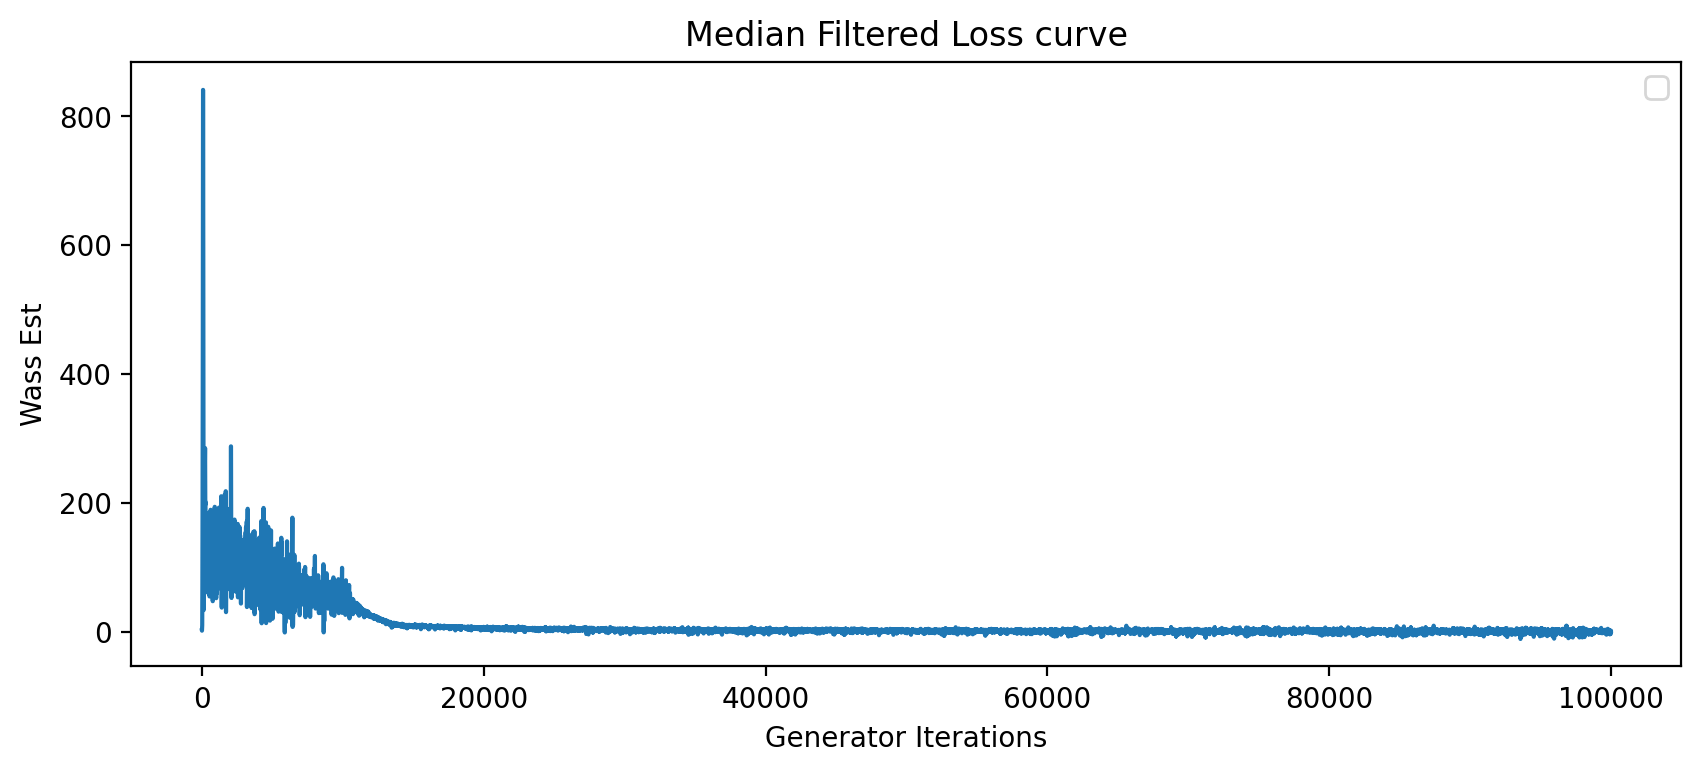

In [13]:
fig = plt.figure(figsize=(10,4), dpi=200)
ax = fig.add_subplot(111)

n = 15
start = 50*n
end = 50*(n+1)
#ax.plot(critic_losses, label='critic loss', alpha=0.7)
#ax.scatter(x, losses, s=10, color='r', label='generator loss')
ax.plot(new_losses)
#ax.set_xlim(400, 2400)
#ax.set_ylim(0, 2)
ax.set_xlabel("Generator Iterations")
ax.set_ylabel("Wass Est")
ax.set_title("Median Filtered Loss curve")
ax.legend()
plt.savefig(save_dir+"losses.png")
plt.show()

In [15]:
cwgan = cWGAN.cWGAN_mnist(0.01, 100)

In [19]:
cwgan.generator.load_weights(save_dir + '/training_checkpoints/gen_35000')

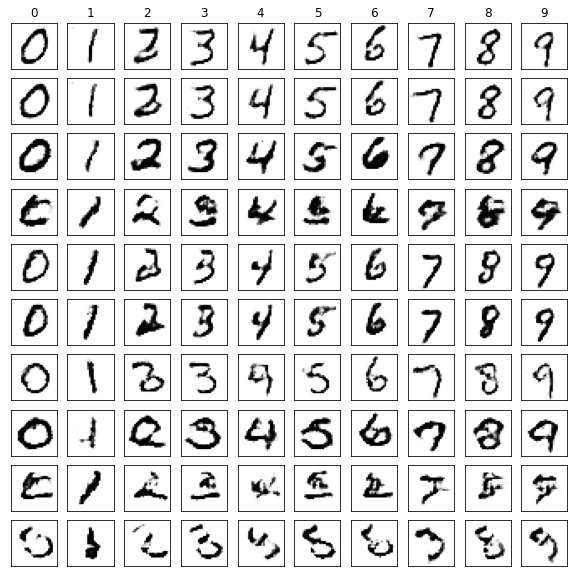

In [20]:
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    noise = np.random.uniform(size=(1, 100))
    for j in range(10):
        number_labels = np.zeros((1, 10))
        number_labels[0, j] = 1
        pred = cwgan.generator([number_labels, noise])
        axs[i, j].imshow(pred[0], cmap='Greys')
        axs[i, j].get_yaxis().set_visible(False)
        axs[i, j].get_xaxis().set_visible(False)
        if i==0:
            axs[i, j].set_title(j)
fname = save_dir + "/MNIST_Results.png"
#plt.savefig(fname)
plt.show()